# Ciencia de Datos e Inteligencia Artificial: Proyecto Final

El presente proyecto constituye un intento de realizar un análisis de datos, así como un modelo predictivo de regresión lineal. Para ello, trabajaré con un dataset del Ranking Mundial de la Felicidad, que contiene información de 158 países y trata de cuantificar la felicidad a nivel nacional a través de distintos indicadores tales como la salud, la economía, etc. El objetivo será ver cómo se relacionan estos indicadores entre sí y cómo reflejan la felicidad en las distintas regiones y países del mundo.

El primer paso será descomprimir el archivo zip para obtener el csv que vamos a emplear, y convertirlo a dataset.

In [1]:
import numpy as np
import pandas as pd
import zipfile
import urllib.request
import os

ruta = os.path.join("res", "archive.zip")

In [2]:
# descomprimiendo archivo zip
ruta_ext = os.path.join("res")
with zipfile.ZipFile(ruta, 'r') as zip: 
    print('Extracting all files...') 
    zip.extractall(ruta_ext) # destinación
    print('Done!')

Extracting all files...
Done!


In [3]:
ruta_felicidad = os.path.join("res", "CountryHappinessRank.csv")
dataset_felicidad = pd.read_csv(ruta_felicidad, sep=',', index_col=0, engine='python')
display(dataset_felicidad)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


Una vez tenemos el dataset, miramos si hay algún nan con el método *.isnull().values.any()* que devuelve True si hay algún nan y False si no hay ninguno.

In [82]:
check_for_nan = dataset_felicidad.isnull().values.any()
print (check_for_nan)

False


Como nos da False, podemos continuar sin problema.

**Lo primero que haremos será limitarnos a relacionar las regiones del mundo con la puntuación en el indicador de felicidad.** Para ello, podemos servirnos del "happiness score" para obtener la puntuación media de cada región del mundo. 

In [4]:
#lo primero sería sacar un dataframe de 2 columnas más el índice
regiones_puntuacion = dataset_felicidad[['Region', 'Happiness Score']]

#sacamos la puntuacion media por cada region y truncamos a 2 decimales
puntuacion_media = regiones_puntuacion.groupby('Region').mean()
puntuacion_media = puntuacion_media['Happiness Score'].round(2)
puntuacion_media = puntuacion_media.to_frame()

puntuacion_media = puntuacion_media.rename_axis('Region').reset_index()

#ordenamos y mostramos
puntuacion_media = puntuacion_media.sort_values('Happiness Score', ascending=False)
display(puntuacion_media)

,Region,Happiness Score
0,Australia and New Zealand,7.28
5,North America,7.27
9,Western Europe,6.69
3,Latin America and Caribbean,6.14
2,Eastern Asia,5.63
4,Middle East and Northern Africa,5.41
1,Central and Eastern Europe,5.33
6,Southeastern Asia,5.32
7,Southern Asia,4.58
8,Sub-Saharan Africa,4.20


Una vez hecho esto, podemos calcular también el PIB per cápita (GPB) medio de cada región, para ver si las regiones con una economía más próspera son también las más felices. Esto nos permitirá hacernos una idea de qué peso tiene esta variable con respecto a las demás a la hora de sacar el índice global de la felicidad y cómo se refleja la economía en los resultados de felicidad media a nivel regional.

In [6]:
#repetimos el mismo proceso con el pib
regiones_pib = dataset_felicidad[['Region', 'Economy (GDP per Capita)']]

pib_medio = regiones_pib.groupby('Region').mean()
pib_medio = pib_medio['Economy (GDP per Capita)'].round(2)
pib_medio = pib_medio.to_frame()

pib_medio = pib_medio.rename_axis('Region').reset_index()

pib_medio = pib_medio.sort_values('Economy (GDP per Capita)', ascending=False)
display(pib_medio)

,Region,Economy (GDP per Capita)
5,North America,1.36
9,Western Europe,1.30
0,Australia and New Zealand,1.29
2,Eastern Asia,1.15
4,Middle East and Northern Africa,1.07
1,Central and Eastern Europe,0.94
3,Latin America and Caribbean,0.88
6,Southeastern Asia,0.79
7,Southern Asia,0.56
8,Sub-Saharan Africa,0.38


Vemos que el orden de las regiones no coincide, pero podemos hacer una gráfica que nos permita ver la relación entre ambas variables.

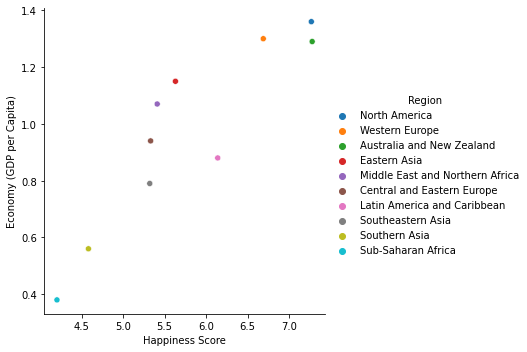

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

felicidad_y_pib = pd.merge(pib_medio, puntuacion_media, how='inner', on='Region')

ax = sns.relplot(data= felicidad_y_pib, x= 'Happiness Score', y='Economy (GDP per Capita)', hue= 'Region', legend="full")
plt.show()

 Efectivamente, esta gráfica nos muestra que en general, cuanto mejores resultados tiene una región en su PIB medio, mejores resultados obtiene también en el índice de felicidad. Se deduce una línea ascendente. Esto es evidente porque la puntuación en felicidad se extrae de los demás indicadores, incluido el económico, pero queremos ver cuánto influye una buena economía en una buena puntuación en felicidad. Hemos visto que en principio influye mucho.
 No obstante, vemos que América Latina sería una clara excepción, ya que a nivel económico está por debajo de otras regiones que presentan economías más prósperas pero resultados más modestos en la puntuación de felicidad. Por tanto, cabe suponer que los resultados de América Latina se explican por altas puntuaciones en otros indicadores. Veámoslo. 

C:\Users\gabri\AppData\Local\Temp\ipykernel_23192\88811430.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  media_total = medias_regiones.mean()


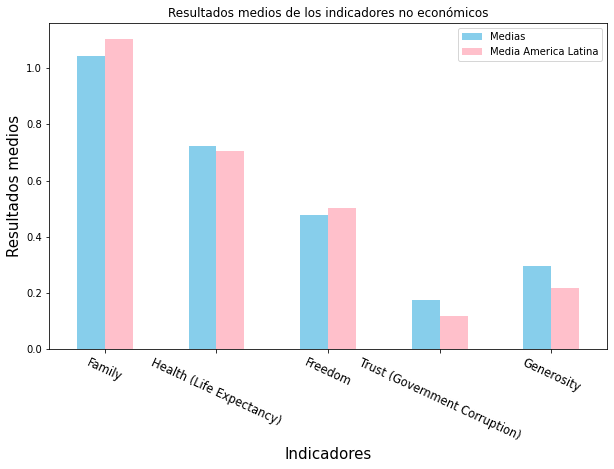

In [8]:
#primero sacamos una tabla con las regiones y los indicadores que vamos a mirar
#nota: he puesto "indicadores no económicos" para entenderme pero generosidad sí es económico
indicadores_no_economicos = dataset_felicidad[['Region','Family', 'Health (Life Expectancy)','Freedom', 
                                               'Trust (Government Corruption)', 'Generosity' ]]

#sacamos la media de estas variables y agrupamos por region
medias_regiones = indicadores_no_economicos.groupby('Region').mean()
medias_regiones = medias_regiones.rename_axis('Region').reset_index()

#dejamos solo las medias de America Latina
media_america_latina = medias_regiones.loc[medias_regiones['Region'] == 'Latin America and Caribbean']

#sacamos la media total de todas las regiones para todos los indicadores no económicos
media_total = medias_regiones.mean()
media_total = media_total.to_frame()
media_total = media_total.rename_axis('Indicadores').reset_index()
media_total.rename(columns = {0:'Medias'}, inplace = True)

#convertimos las columnas del dataframe de america latina a filas y cambios los nombres de las mismas
media_america_latina = media_america_latina.transpose()
media_america_latina = media_america_latina.rename_axis('Indicadores').reset_index()
media_america_latina = media_america_latina.drop(media_america_latina.index[[0]])

#unimos ambas tablas
medias_totales_y_america_latina = pd.merge(media_total, media_america_latina,how='inner', on='Indicadores')
medias_totales_y_america_latina.rename(columns = {3:'Media America Latina'}, inplace = True)

#hacemos la gráfica y la mostramos
medias_totales_y_america_latina.plot(x="Indicadores", y=["Medias", "Media America Latina"], kind="bar", width = 0.5, figsize=(10,6), color= ('skyblue','pink'))
plt.yticks((0, 0.2, 0.4, 0.6, 0.8, 1))
plt.xticks(size=11.5, rotation=-25)
plt.xlabel("Indicadores", size=15)
plt.ylabel("Resultados medios", size=15)
plt.title("Resultados medios de los indicadores no económicos")

plt.show()



La tabla que hemos elaborado nos muestra que tal y como suponíamos, América Latina tiene resultados por encima de la media global en los ámbitos de familia y libertad, mientras que se mantiene algo por debajo en confianza, generosidad y salud, aunque en general los resultados de esta región se mantienen muy cerca de la media global en todos los indicadores que hemos considerado.

**Ahora, vamos a visualizar la relación entre tres indicadores: la economía, la libertad y la corrupción**. Se presupone que a mejor sea la economía y la confianza en el gobierno, mayor libertad.

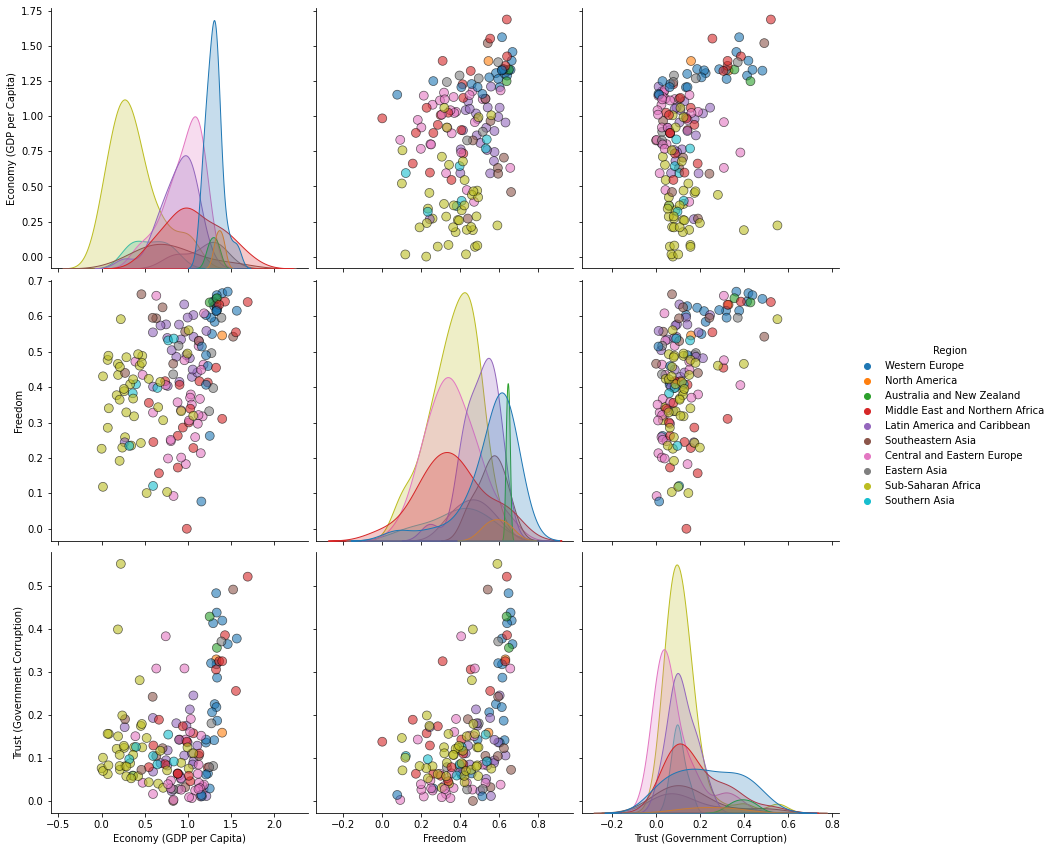

In [9]:
sns.pairplot(dataset_felicidad, 
             vars = ['Economy (GDP per Capita)', 'Freedom', 'Trust (Government Corruption)'], 
             hue = 'Region', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

Aquí se aprecia que en general, hay correlación entre estas variables, pero hay países donde esto no está tan clara. Por ejemplo, en cuanto a la relación entre economía y libertad, podemos apreciar que hay una concentración de países de África Subsahariana que presentan altos resultados en libertad pese a tener un PIB bajo. Por otra parte, en la relación entre la confianza en los gobiernos y la corrupción y las otras dos variables, podemos apreciar que son pocos los países que tienen una alta confianza en sus gobiernos, y son bastantes los países que presentan elevados índices de corrupción a pesar de tener buenos resultados en economía y libertad. 

**Aprovechando los dataframes que tenemos, vamos a elaborar un mapa de calor para visualizar todas las medias de todas las variables por región, incluyendo también los resultados de felicidad.** Esto nos ayuda a tener una panorámica de la correlación entre todas las variables.

<AxesSubplot:>

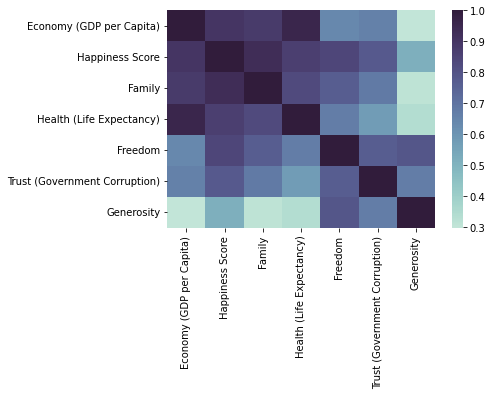

In [10]:
medias_todos_indicadores = pd.merge(felicidad_y_pib, medias_regiones,how='inner', on='Region')

sns.heatmap(medias_todos_indicadores.select_dtypes(include='number').corr(),
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

Este mapa nos muestra qué variables guardan más y menos relación entre sí, siendo los cuadrados más claros los que representan una menor relación, mientras que los oscuros indican que las variables están más relacionadas. Por ejemplo, vemos que familia y generosidad no están muy relacionadas, pero los resultados en familia sí están muy relacionados con la economía, por ejemplo.

**A continuación realizaré algunas consultas sobre las variables por región y país**:

Primero, voy a ver cuáles son las regiones con mayores y menores resultados de felicidad, así como la media global de felicidad.

In [11]:
#cambiamos el nombre de la columna de la puntuación en felicidad en el df de las medias de regiones
medias_todos_indicadores.rename(columns = {'Happiness Score':'Felicidad'}, inplace = True)

#sacamos máximos, mínimos y medias de felicidad por región y redondeamos
max_felicidad = medias_todos_indicadores['Felicidad'].max()
min_felicidad = medias_todos_indicadores['Felicidad'].min()
media_felicidad = medias_todos_indicadores['Felicidad'].mean()
media_felicidad = media_felicidad.round(2)

#buscamos la región más feliz y la menos feliz
region_max_felicidad = medias_todos_indicadores[medias_todos_indicadores.Felicidad == max_felicidad][['Felicidad','Region']]
region_min_felicidad = medias_todos_indicadores[medias_todos_indicadores.Felicidad == min_felicidad][['Felicidad','Region']]

#mostramos los resultados
region_mas_feliz = region_max_felicidad['Region'].to_string(index=False)
print("The happiest region in the world is", region_mas_feliz)

region_menos_feliz = region_min_felicidad['Region'].to_string(index=False)
print("The least happy region in the world is", region_menos_feliz)

print("The mean global happiness score is", media_felicidad)

The happiest region in the world is Australia and New Zealand
The least happy region in the world is Sub-Saharan Africa
The mean global happiness score is 5.79


Ahora, voy a sacar una lista de los diez países con mejores resultados en salud.

In [12]:
#sacamos todos los países de la columna de salud
paises_salud = dataset_felicidad[['Health (Life Expectancy)']]

#ordenamos los resultados en sentido descendente y sacamos los diez países con mayores resultados
paises_salud = paises_salud.sort_values('Health (Life Expectancy)', ascending=False)
diez_paises_salud = paises_salud.head(n=10)

#sacamos los nombres de los países con mejores resultados
diez_paises_salud = diez_paises_salud.rename_axis('Country').reset_index()
diez_paises_salud = diez_paises_salud['Country'].to_list()


print('The ten countrys with the best health results are:', diez_paises_salud)

The ten countrys with the best health results are: ['Singapore', 'Hong Kong', 'Japan', 'South Korea', 'Spain', 'Italy', 'Iceland', 'France', 'Switzerland', 'Australia']


Lo siguiente va a ser sacar los resultados que tiene España en libertad y corrupción.

In [118]:
#sacamos los resultados de libertad y corrupción/confianza para todos los países
libertad_corrupcion = dataset_felicidad[['Freedom', 'Trust (Government Corruption)']]

#resetamos el índice, que en este caso son los países, y buscamos España
libertad_corrupcion = libertad_corrupcion.rename_axis('Country').reset_index()
resultados_es = libertad_corrupcion[(libertad_corrupcion['Country']=='Spain')]

#sacamos los resultados y los redondeamos a 3 decimales
es_res_libertad = resultados_es['Freedom'].round(3)
es_res_corrupcion = resultados_es['Trust (Government Corruption)'].round(3)

#convertimos a cadena de caracteres y mostramos los resultados
es_res_libertad = es_res_libertad.to_string(index=False)
es_res_corrupcion = es_res_corrupcion.to_string(index=False)

print('The result of Spain in trust is', es_res_corrupcion, 'and', es_res_libertad, 'in freedom')

The result of Spain in trust is 0.064 and 0.46 in freedom


Con estos resultados, vamos a ver cuántos países tienen mayores resultados en libertad y confianza en los gobiernos simultáneamente, y cuáles son estos países.

In [14]:
#sacamos los países con mejores resultados en libertad
mas_libertad= libertad_corrupcion[libertad_corrupcion.Freedom >= float(es_res_libertad)]

#cambiamos el nombre de la columna del indicador confianza para simplificar y sacamos los países con mejores resultados en confianza
libertad_corrupcion.rename(columns = {'Trust (Government Corruption)':'Trust'}, inplace = True)
mas_confianza = libertad_corrupcion[libertad_corrupcion.Trust >= float(es_res_libertad)]

#unimos los resultados en un mismo frame usando inner para descartar los países que no están en ambas
mas_libertad_confianza = pd.merge(left=mas_libertad,right=mas_confianza, how='inner')

#contamos para saber cuántos hay y los metemos en una lista
cuantos_mas_libertad_confianza = mas_libertad_confianza['Country'].count()
que_paises_son = mas_libertad_confianza['Country'].to_list()

print('There are', cuantos_mas_libertad_confianza, 'countries that have better results than Spain',
      'in freedom and trust.')
print('These countries are:', que_paises_son)

**Ahora vamos a hacer un análisis de la relación dos pares de variables, esta vez abarcando la totalidad de los países.** 

El primer par será la relación entre la economía y la generosidad, partiendo de la hipótesis de que un país con mayor prosperidad económica tendrá mejores resultados en generosidad. El segundo par será la relación entre economía y salud, asumiendo que un país con mejores resultados en su PIB tendrá también mejores resultados en salud.

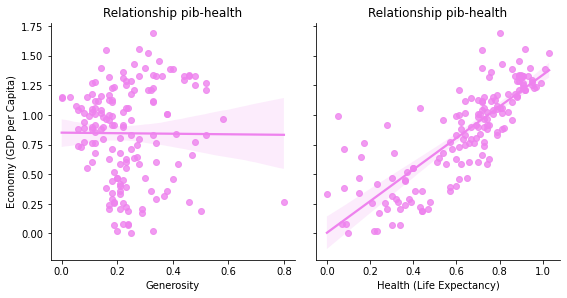

In [81]:
#hacemos un dataset con las dos variables y los países
economia_generosidad_salud = dataset_felicidad[['Economy (GDP per Capita)', 'Generosity', 'Health (Life Expectancy)']]
economia_generosidad_salud = economia_generosidad_salud.sort_values('Economy (GDP per Capita)', ascending= False)

#redondeamos a dos decimales y hacemos que el país deje de ser el índice
economia_generosidad_salud = economia_generosidad_salud.round(2)
economia_generosidad_salud = economia_generosidad_salud.rename_axis('Country').reset_index()

#mostramos los resultados
g = sns.PairGrid(economia_generosidad_salud, y_vars=["Economy (GDP per Capita)"], x_vars=["Generosity", "Health (Life Expectancy)"], height=4).set(
    title='Relationship pib-generosity' and 'Relationship pib-health')
g.map(sns.regplot, color="violet")


La variable generosidad mide el promedio nacional de la respuesta de los ciudadanos a la pregunta de si han donado a organizaciones benéficas, y se calcula sobre el PIB. No obstante, en la gráfica anterior podemos ver que los resultados extán muy dispersos, y que hay países con economías en vías de desarrollo que presentan altos resultados en sus niveles de generosidad y viceversa. Por tanto, vemos que una economía más próspera no necesariamente implica que su población sea más generosa. 

En cuanto a la salud o expectativas de vida, puede apreciarse que los valores están distribuidos en sentido ascendente, de modo que al aumentar la economía aumentan a su vez las expectativas de vida. En este caso, se puede ver que existe una clarísima correlación entre ambas variables.

**Por último, vamos a cerrar este estudio elaborando un modelo de regresión lineal para predecir los resultados de felicidad de un país partiendo de sus resultados en todos los indicadores.**

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score
import datetime
import sys

#sacamos un df con los indicadores por país
todos_indicadores_paises = dataset_felicidad[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                                              'Freedom', 'Trust (Government Corruption)', 'Generosity','Dystopia Residual']]
#hacemos otro df con los resultados de feliciad
resultados_felicidad = dataset_felicidad[['Happiness Score']]

#igualamos la x a los indicadores y la y a los resultados
X = todos_indicadores_paises
y = resultados_felicidad

#separamos en datos de entrenamiento y datos de test y hacemos la regresion lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#preparamos los inputs
PIB= float(input('Introduzca el PIB del país:'))
Familia= float(input('Introduzca los resultados del indicador "familia":'))
Salud= float(input('Introduzca los resultados del país en expectativas de vida:'))
Libertad= float(input('Introduzca los resultados del indicador "libertad":'))
Confianza= float(input('Introduzca los resultados en confianza:'))
Generosidad= float(input('Introduzca los resultados del indicador "generosidad":'))
Distopia_residual= float(input('Introduzca la distopía residual:'))

dato_introducido= {'Economy (GDP per Capita)':[PIB], 'Family':[Familia], 'Health (Life Expectancy)':[Salud],
                   'Freedom':[Libertad], 'Trust (Government Corruption)': [Confianza], 'Generosity': [Generosidad],
                  'Dystopia Residual':[Distopia_residual]}

df3 = pd.DataFrame(dato_introducido)
y_pred_df3 = linreg.predict(df3)

print('Según el modelo escogido, el país con los resulados introducidos tendrá la siguiente puntuación en felicidad:', y_pred_df3)

Introduzca el PIB del país: 0.3
Introduzca los resultados del indicador "familia": 0.5
Introduzca los resultados del país en expectativas de vida: 0.7
Introduzca los resultados del indicador "libertad": 0.2
Introduzca los resultados en confianza: 1
Introduzca los resultados del indicador "generosidad": 0.6
Introduzca la distopía residual: 2


Según el modelo escogido, el país con los resulados introducidos tendrá la siguiente puntuación en felicidad: [[5.29997368]]


**Ahora, vamos a sacar una predicción de los datos para Suiza y Togo, el primer y último país del ranking, y vamos a compararlo con los resultados reales de dichos países para probar la eficacia del modelo.**

In [117]:
#sacamos todos los datos de Suiza y Togo
datos_suiza = dataset_felicidad[dataset_felicidad['Happiness Rank'] == 1]
datos_togo = dataset_felicidad[dataset_felicidad['Happiness Rank'] == 158]

#quito las variables que no queremos
datos_suiza = datos_suiza.drop(labels=['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error'], axis=1)
datos_togo = datos_togo.drop(labels=['Region', 'Happiness Rank', 'Happiness Score','Standard Error'], axis=1)

y_pred_suiza = linreg.predict(datos_suiza)
y_pred_togo = linreg.predict(datos_togo)

print(y_pred_suiza)
print(y_pred_togo)

[[7.58692433]]
[[2.83895523]]


En el primer intento, los resultados que se obtienen para Suiza y Togo son de 7.58692433 y 2.83895523 respectivamente, siendo los resultados reales de 7.587 y de 2.839. Redondeando son los mismos resultados, lo que nos muestra que en principio, el modelo funciona correctamente.